# Strojenie parametrów - czyli jak znaleźć najlepszy model?

Dekompozycja błędu średniokwadratowego estymatora
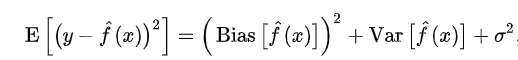

ostatni człon wynika z błędu losowego opisywanego jako $\epsilon=0+\sigma^2$ - źródłem tego błędu są dane a nie model

![image.png](http://snoek.ddns.net/~oliver/mysite/images/blog7_accuracyprecision_banner.png)
http://snoek.ddns.net/~oliver/mysite/the-bias-variance-tradeoff.html

### **wariancja ~ wrażliwość**

## **Bias-variance tradeoff**
![image](https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Kompromis_mi%C4%99dzy_obci%C4%85%C5%BCeniem_a_wariancj%C4%85_%E2%80%93_dekompozycja.svg/800px-Kompromis_mi%C4%99dzy_obci%C4%85%C5%BCeniem_a_wariancj%C4%85_%E2%80%93_dekompozycja.svg.png)
https://pl.wikipedia.org/wiki/Kompromis_mi%C4%99dzy_obci%C4%85%C5%BCeniem_a_wariancj%C4%85

Jakie techniki pozwalają zbliżyć się do kompromisu?
- regularyzacja
- komitety

- *kroswalidacja

In [65]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
np.random.seed(123) 

In [66]:
data=pd.read_csv('heart.csv')

In [67]:
y = np.array(data['chd'])
X = data.drop(['chd'],axis=1)

In [68]:
map_dict = {'Present': 1, 'Absent':0}
X['famhist'] = X['famhist'].map(map_dict)
X.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49


### Podział na train, test

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

### Drzewo decyzyjne

In [70]:
from sklearn.tree import DecisionTreeClassifier
#parametry domyślne
tree_model= DecisionTreeClassifier()

In [71]:
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [72]:
tree_model.fit(X_train, y_train);

In [73]:
tree_model.score(X_test, y_test)

0.6344086021505376

### Kroswalidacja

In [10]:
import sklearn
from sklearn.model_selection import cross_val_score
tree_model= DecisionTreeClassifier()
results=cross_val_score(tree_model, X, y) # można zdefiniować: scoring='roc_auc'
# uwaga: tutaj nie strojono parametrów więc można użyć całego zbioru
print(np.mean(results), np.std(results))

0.6644693782141188 0.023197947221853043


In [74]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

## Strojenie parametrów
![image.png](https://analyticsindiamag.com/wp-content/uploads/2018/06/both.png)
https://analyticsindiamag.com/why-is-random-search-better-than-grid-search-for-machine-learning/

### Grid Search

In [12]:
from sklearn.model_selection import GridSearchCV

In [75]:
max_depth=[3, 5, 6]
criterion=["gini","entrophy"]
ccp_alpha=[0, 0.05]
param_grid = dict(max_depth=max_depth,criterion=criterion, ccp_alpha=ccp_alpha)

In [14]:
tree_model= DecisionTreeClassifier()
grid = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv = 3, n_jobs=-1)

grid_result = grid.fit(X_train, y_train) #tutaj lepiej zastosować tylko trainset

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.680217 using {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 3}


In [15]:
std_test_scores = grid_result.cv_results_['std_test_score']
mean_test_scores = grid_result.cv_results_['mean_test_score']
parameters = grid_result.cv_results_['params']

for mean_test, std_test, params in zip(mean_test_scores, std_test_scores, parameters):
    print('Parameters : {}'.format(params))
    print('Mean test score: {:.8f}'.format(mean_test))
    print('Standard Deviation (test) : {:.8f}'.format(std_test))
    print()

print('Best parameters : {}'.format(grid_result.best_params_))
print('Best accuracy score : {:.8f}'.format(grid_result.best_score_))


Parameters : {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 3}
Mean test score: 0.68021680
Standard Deviation (test) : 0.04267755

Parameters : {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 5}
Mean test score: 0.64769648
Standard Deviation (test) : 0.04055997

Parameters : {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 6}
Mean test score: 0.65853659
Standard Deviation (test) : 0.05310547

Parameters : {'ccp_alpha': 0, 'criterion': 'entrophy', 'max_depth': 3}
Mean test score: nan
Standard Deviation (test) : nan

Parameters : {'ccp_alpha': 0, 'criterion': 'entrophy', 'max_depth': 5}
Mean test score: nan
Standard Deviation (test) : nan

Parameters : {'ccp_alpha': 0, 'criterion': 'entrophy', 'max_depth': 6}
Mean test score: nan
Standard Deviation (test) : nan

Parameters : {'ccp_alpha': 0.05, 'criterion': 'gini', 'max_depth': 3}
Mean test score: 0.65853659
Standard Deviation (test) : 0.00663818

Parameters : {'ccp_alpha': 0.05, 'criterion': 'gini', 'max_depth': 5}
Mean test sc

In [16]:
best_model=grid_result.best_estimator_
best_model.score(X_test, y_test)

0.6666666666666666

przykład wizualizacji:
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html

### Random Search 

In [17]:
from sklearn.model_selection import RandomizedSearchCV

In [18]:
random = RandomizedSearchCV(estimator=tree_model, param_distributions=param_grid, cv = 3, n_jobs=-1)

random_result = random.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best: 0.680217 using {'max_depth': 3, 'criterion': 'gini', 'ccp_alpha': 0}


In [19]:
best_model=random_result.best_estimator_
best_model.score(X_test, y_test)

0.6666666666666666

- możliwość zdefiniowania rozkładów

In [20]:
from scipy.stats import poisson,expon
param_grid = {'ccp_alpha': expon(0.08),
             'max_depth': poisson(5)}

In [21]:
random = RandomizedSearchCV(estimator=tree_model, param_distributions=param_grid, cv = 3, n_jobs=-1, random_state=123)

random_result = random.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best: 0.655827 using {'ccp_alpha': 1.2722721434811057, 'max_depth': 7}


https://ksopyla.com/machine-learning/grid-random-search-scikit-learn-dobor-parametrow/

## Bayes optimization
- "inteligentne szukanie nowych kombinacji"

In [ ]:
#!pip install scikit-optimize

In [23]:
from skopt import BayesSearchCV
from sklearn.svm import SVC

opt = BayesSearchCV(
    SVC(),
    {
        'degree': (1, 8),  # integer valued parameter
        'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    },
    n_iter=5, #generalnie powinno być więcej, ale wtedy długo trwa
    cv=3
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))

val. score: 0.7235772357723578
test score: 0.7419354838709677


https://scikit-optimize.github.io/stable/auto_examples/sklearn-gridsearchcv-replacement.html

### Jak robić strojenie parametrów dla różnych modeli?
- http://www.davidsbatista.net/blog/2018/02/23/model_optimization/
- https://stackoverflow.com/questions/50265993/alternate-different-models-in-pipeline-for-gridsearchcv

# AutoML
Istnieje dużo gotowych narzędzi.

### TPOT

![image.png](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537396029/output_2_0_d7uh0v.png)
https://www.datacamp.com/community/tutorials/tpot-machine-learning-python

In [24]:
#! pip install tpot

In [25]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=3,verbosity=2)

tpot.fit(X_train, y_train)


Generation 1 - Current best internal CV score: 0.7209552017771196

Generation 2 - Current best internal CV score: 0.7237319511292114

Generation 3 - Current best internal CV score: 0.7317289892632357

Best pipeline: MLPClassifier(MinMaxScaler(input_matrix), alpha=0.0001, learning_rate_init=0.001)


TPOTClassifier(generations=3, verbosity=2)

In [26]:
tpot.score(X_test, y_test)

0.7419354838709677

In [60]:
#drugie uruchomienie

tpot1 = TPOTClassifier(generations=3,verbosity=2)

tpot1.fit(X_train, y_train)


Generation 1 - Current best internal CV score: 0.731803035912625

Generation 2 - Current best internal CV score: 0.731803035912625

Generation 3 - Current best internal CV score: 0.7345427619400222

Best pipeline: BernoulliNB(MLPClassifier(GaussianNB(input_matrix), alpha=0.01, learning_rate_init=0.01), alpha=0.001, fit_prior=True)


TPOTClassifier(generations=3, verbosity=2)

In [64]:
tpot1.score(X_test, y_test)

0.6774193548387096

### HyperOPT

In [ ]:
#!pip install hyperopt

In [ ]:
#!pip install git+https://github.com/hyperopt/hyperopt-sklearn

In [27]:
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier, any_preprocessing
from hyperopt import tpe

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [59]:
model = HyperoptEstimator(classifier=any_classifier('cla'), preprocessing=any_preprocessing('pre'), algo=tpe.suggest, max_evals=10, trial_timeout=30)

model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
print("Accuracy: %.3f" % acc)
print(model.best_model())

100%|███████████████████████████████████████████████| 10/10 [00:06<00:00,  6.20s/trial, best loss: 0.22972972972972971]
Accuracy: 0.710
{'learner': SVC(C=0.0006609031290540793, cache_size=512, coef0=0.1033031505590924,
    degree=2.0, gamma=0.02483895280090038, kernel='poly', max_iter=455167965.0,
    random_state=3, tol=1.0628220526156764e-05), 'preprocs': (), 'ex_preprocs': ()}


# Selekcja zmiennych

### Filtry

Najprostsze metody, można z nich korzystać nie wykorzystując nawet modeli. Można wykonać ten krok na etapie preprocessingu danych.

Przykłady:
- korelacja ze zmienną celu
- informacja wzajema ze zmienną celu (VIF)

In [29]:
X_y = X.copy()
X_y['Target'] = y

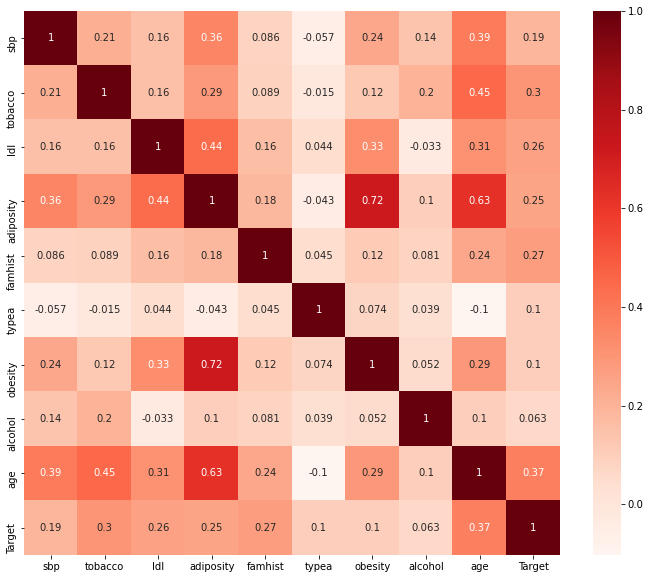

In [30]:
plt.figure(figsize=(12,10))
cor = X_y.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Metody wbudowane
Niektóre metody mają wbudowane metody feature importance, np. Random Forest (omówiono na poprzednich zajęciach).

https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3

### Wrappery
Oceniają poszczególne zbiory zmiennych na podstawie wybranych metryk (accuracy, AUC, ...). Zazwyczaj działa to w ten sposób, że iteracyjnie dodajemy/odejmujemy kolejne zmienne aż osiągniemy daną liczbę zmiennych/wynik modelu.

Przykłady:
- Recursive Feature Elimination
- Forward Selection
- Boruta

**Recursive Feature Elimination**
1. Uczymy model na wszystkich zmiennych
2. Iteracyjnie usuwamy kolejne zmienne, które mają najmniejszy importance (atrybut: featureimportances)
3. Powtarzamy 2 aż osiągniemy określoną liczbę zmiennych

### Recursive Feature Elimination

In [31]:
from sklearn.feature_selection import RFE
estimator = tree_model
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train) 

In [32]:
print(selector.support_)
selector.ranking_

[False False  True False False  True  True False False]


array([6, 3, 1, 4, 7, 1, 1, 5, 2])

### Boruta

In [ ]:
!pip install boruta

In [80]:
from boruta import BorutaPy
# for classification only (we need to convert pd.DataFrame to np.array)

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

feat_selector.fit(X_train.values, y_train)
feat_selector.support_
print(feat_selector.ranking_)

# wybór odpowiednich zmiennych ze zbioru testowego
X_filtered = feat_selector.transform(X_test.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	3
Iteration: 	17 / 

### SelectKBest

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

tree_model=DecisionTreeClassifier()

pipe = Pipeline([
    ('select', SelectKBest()),
    ('model', tree_model)])

k=[5,6]
max_depth=[3, 5, 6]
criterion=["gini","entrophy"]

# uwaga: gdy podajemy parametry do strojenia gdy mamy pipeline to trzeba w nazwach kluczy podać nazwę_danego_etapu__ 
# (poprzedzoną dwoma podkreślnikami)
param_grid = {"model__max_depth": max_depth, "model__criterion": criterion, "select__k": k}

search = GridSearchCV(pipe, param_grid, cv=5).fit(X_train, y_train)

In [36]:
search.score(X_test, y_test)

0.7204301075268817